# Task 4

# Movie Ticket Price Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.chdir(r'C:\Users\HP\Untitled Folder 3')

# Read csv file

In [3]:
df = pd.read_csv("CinemaTicket.csv")
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


# Head 

In [4]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


# Shape

In [5]:
 df.shape

(142524, 14)

# Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


# Null values

In [7]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [8]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [9]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [10]:
#df.drop(columns=['film_code'] ,inplace=True)

In [11]:
#df.drop(columns=['cinema_code'] ,inplace=True)

In [12]:
#df.drop(columns=['show_time'] ,inplace=True)

In [13]:
#df.drop(columns=['occu_perc'] ,inplace=True)

In [14]:
#df.columns

In [15]:
corr_mat = df.corr()
corr_mat


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
film_code,1.000000,0.029530,0.009802,-0.005588,-0.000920,0.076670,-0.104120,0.104820,-0.005582,0.061224,0.851380,0.800933,-0.028686
cinema_code,0.029530,1.000000,-0.012910,-0.053716,0.019534,-0.187125,0.125542,0.005079,-0.053957,-0.353402,0.051027,0.049646,-0.000270
total_sales,0.009802,-0.012910,1.000000,0.915176,0.066810,0.509812,0.414418,0.272450,0.915112,0.376134,-0.080568,-0.051433,-0.000424
tickets_sold,-0.005588,-0.053716,0.915176,1.000000,0.071498,0.522088,0.493707,0.103596,0.999946,0.425468,-0.103477,-0.062666,-0.005037
tickets_out,-0.000920,0.019534,0.066810,0.071498,1.000000,0.078860,0.044407,0.011916,0.061091,0.037599,-0.012448,-0.007210,0.004441
show_time,0.076670,-0.187125,0.509812,0.522088,0.078860,1.000000,0.055617,0.176274,0.521625,0.681645,-0.023297,-0.020643,0.007646
occu_perc,-0.104120,0.125542,0.414418,0.493707,0.044407,0.055617,1.000000,0.084666,0.493585,-0.141262,-0.145100,-0.088856,-0.011061
ticket_price,0.104820,0.005079,0.272450,0.103596,0.011916,0.176274,0.084666,1.000000,0.103544,0.004287,0.048007,0.042031,0.001113
ticket_use,-0.005582,-0.053957,0.915112,0.999946,0.061091,0.521625,0.493585,0.103544,1.000000,0.425370,-0.103418,-0.062634,-0.005087
capacity,0.061224,-0.353402,0.376134,0.425468,0.037599,0.681645,-0.141262,0.004287,0.425370,1.000000,-0.025265,-0.023940,0.006255


# index
- this attribute provides the index of dataframe

In [16]:
df.index

RangeIndex(start=0, stop=142524, step=1)

# dtypes
- it shows the Data-types of each columns.

In [17]:
df.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
date             object
month             int64
quarter           int64
day               int64
dtype: object

In [18]:
df['month'].unique()

array([ 5,  8,  7,  6,  9, 10, 11,  3,  4,  2], dtype=int64)

In [19]:
df['day'].unique()

array([ 5,  4,  3,  2,  6,  1, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 20,
       19, 18, 17, 16, 12, 15, 14, 13, 11, 10,  8,  7, 21,  9],
      dtype=int64)

In [20]:
df['quarter'].unique()

array([2, 3, 4, 1], dtype=int64)

# Total unique values
- in a Columns it shows al unique values. it can applied on a single Column only, not on the Whole dataframe.

In [21]:
df.nunique()

film_code          48
cinema_code       246
total_sales      9464
tickets_sold     2231
tickets_out        96
show_time          51
occu_perc        9311
ticket_price    23235
ticket_use       2283
capacity        57361
date              234
month              10
quarter             4
day                31
dtype: int64

# Missing values in dataframe
- it shows the total no.of non-null values in each column

In [22]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [23]:
df.shape

(142524, 14)

In [24]:
summary=df.describe()
summary

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


# Exploratory Data Anaysis:




 # Univariate Analysis

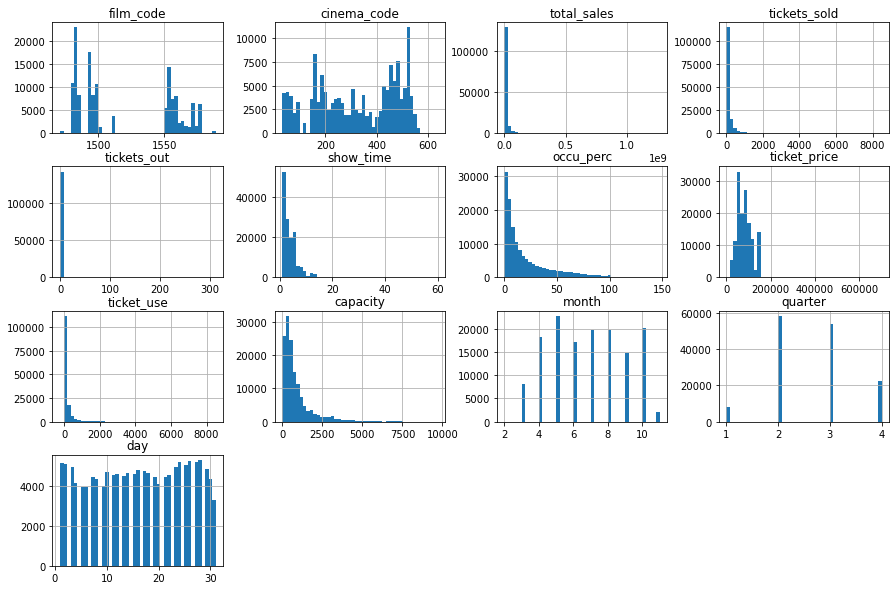

In [25]:
df.hist(bins = 45, figsize = (15,10))
plt.show()

<AxesSubplot:xlabel='tickets_sold'>

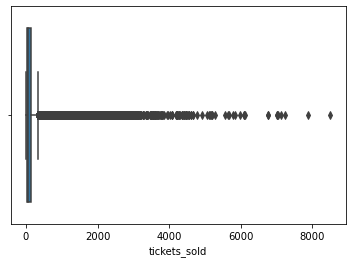

In [26]:
sns.boxplot(df['tickets_sold'])

<AxesSubplot:xlabel='total_sales'>

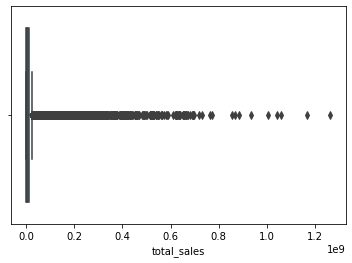

In [27]:
sns.boxplot(df['total_sales'])

<AxesSubplot:xlabel='tickets_sold'>

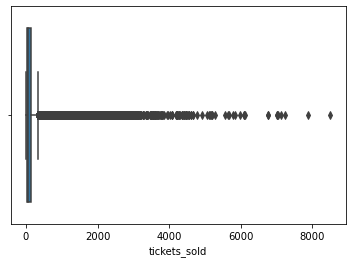

In [28]:
sns.boxplot(df['tickets_sold'])

<AxesSubplot:xlabel='tickets_out'>

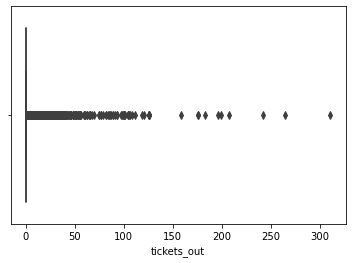

In [29]:
sns.boxplot(df['tickets_out'])

<AxesSubplot:xlabel='show_time'>

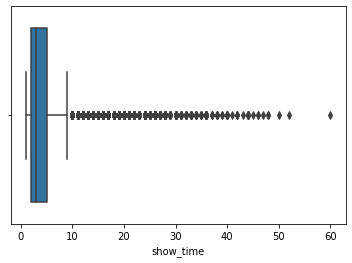

In [30]:
sns.boxplot(df['show_time'])

<AxesSubplot:xlabel='occu_perc'>

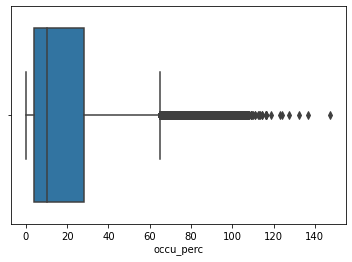

In [31]:
sns.boxplot(df['occu_perc'])

<AxesSubplot:xlabel='ticket_price'>

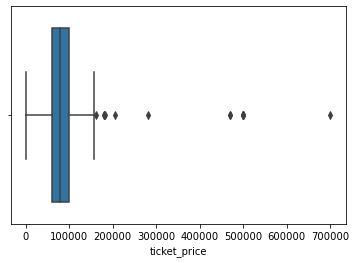

In [32]:
sns.boxplot(df['ticket_price'])

<AxesSubplot:xlabel='ticket_use'>

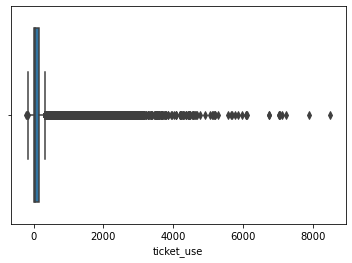

In [33]:
sns.boxplot(df['ticket_use'])

<AxesSubplot:xlabel='capacity'>

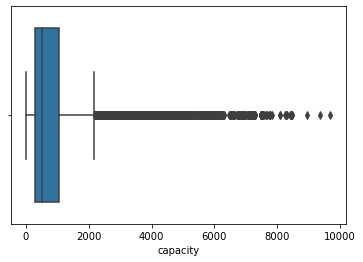

In [34]:
sns.boxplot(df['capacity'])

<AxesSubplot:xlabel='month'>

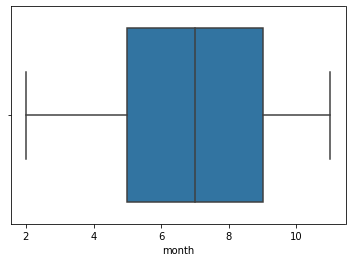

In [35]:
sns.boxplot(df['month'])

<AxesSubplot:xlabel='quarter'>

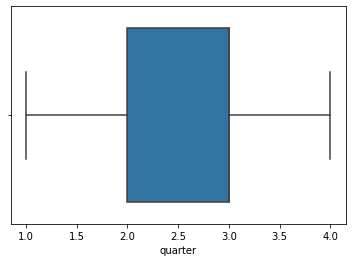

In [36]:
sns.boxplot(df['quarter'])

<AxesSubplot:xlabel='day'>

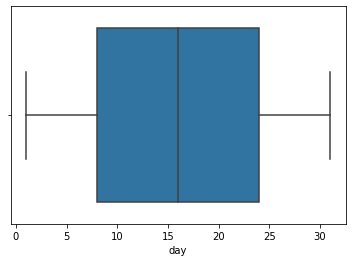

In [37]:
sns.boxplot(df['day'])

In [38]:
print(df['month'].value_counts())

5     22756
10    20052
8     19732
7     19648
4     18315
6     17199
9     14677
3      7994
11     2149
2         2
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

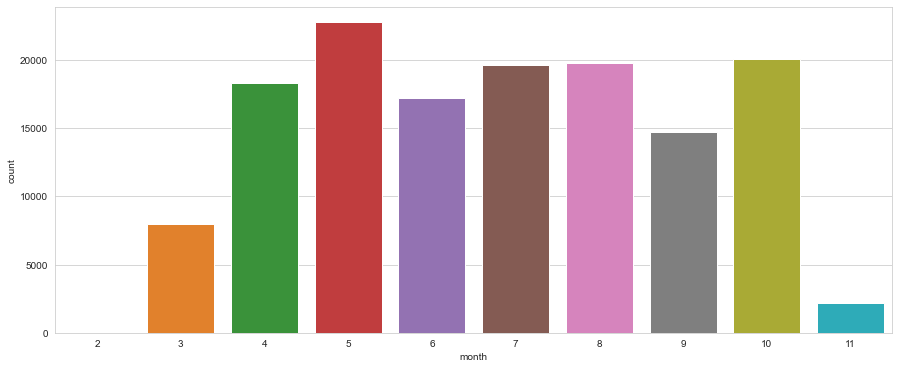

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
sns.countplot(x = 'month', data =df )

In [40]:
print(df['quarter'].value_counts())

2    58270
3    54057
4    22201
1     7996
Name: quarter, dtype: int64


<AxesSubplot:xlabel='quarter', ylabel='count'>

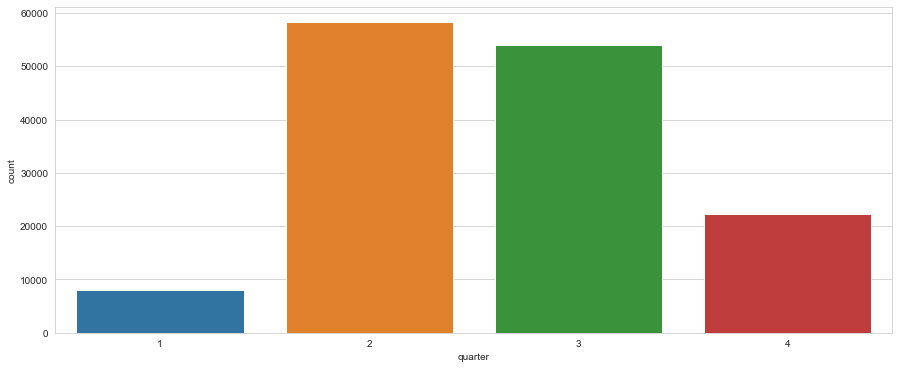

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
sns.countplot(x = 'quarter', data =df )

In [42]:
print(df['day'].value_counts())

28    5283
26    5216
27    5178
24    5169
1     5140
2     5092
25    5048
23    4952
3     4940
29    4856
16    4767
17    4729
10    4682
14    4653
18    4633
15    4605
12    4581
11    4560
22    4549
13    4502
21    4438
7     4436
19    4434
8     4355
30    4338
4     4140
20    4082
9     3979
6     3962
5     3927
31    3298
Name: day, dtype: int64


<AxesSubplot:xlabel='day', ylabel='count'>

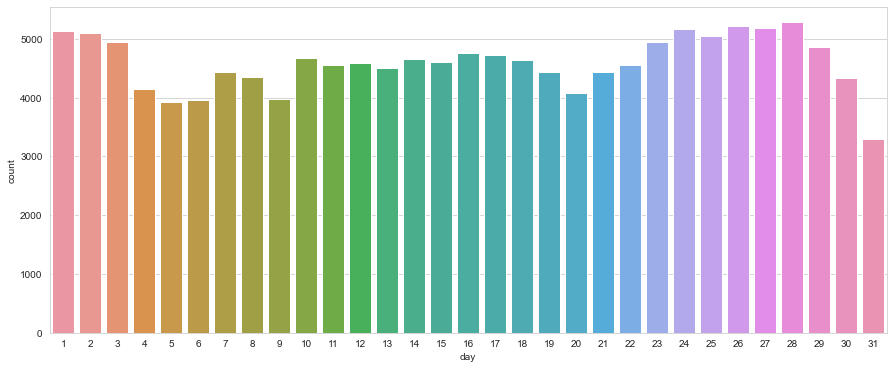

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
sns.countplot(x = 'day', data =df )

In [44]:
#sns.set_style('whitegrid')
#plt.figure(figsize = (15,6))
#sns.countplot(x = 'total_sales', y='day',data =df )

month
2     1.610500e+07
3     2.419735e+07
4     1.903438e+07
5     1.052889e+07
6     6.046949e+06
7     1.348002e+07
8     1.309025e+07
9     6.579655e+06
10    1.155375e+07
11    1.056679e+07
Name: total_sales, dtype: float64

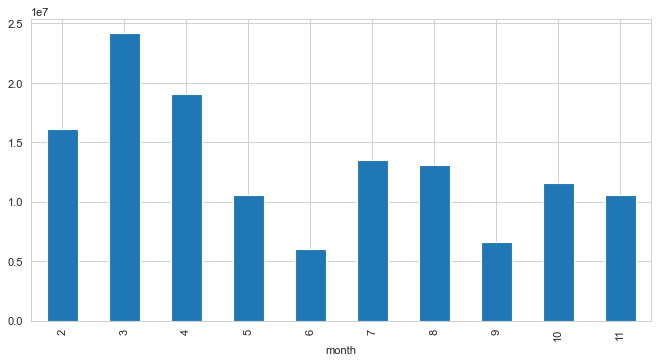

In [45]:
plt.figure(figsize=[10,5],dpi=80)
df.groupby('month')['total_sales'].mean().plot(kind='bar')
df.groupby('month')['total_sales'].mean()

month
2     135.000000
3     229.285089
4     225.750096
5     134.150686
6      72.655096
7     152.281454
8     144.505372
9      73.242420
10    127.865300
11    102.610982
Name: tickets_sold, dtype: float64

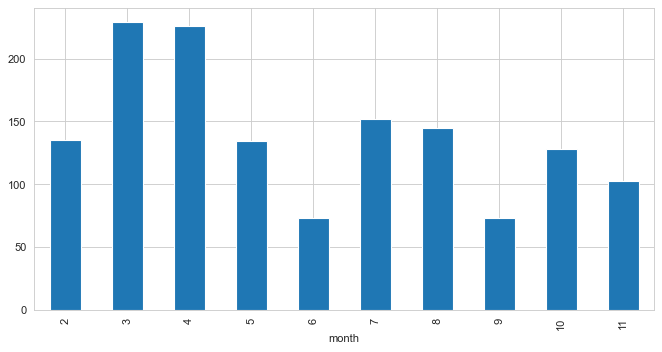

In [46]:
plt.figure(figsize=[10,5],dpi=80)
df.groupby('month')['tickets_sold'].mean().plot(kind='bar')
df.groupby('month')['tickets_sold'].mean()

month
2     0.000000
3     0.211158
4     0.369970
5     0.247012
6     0.190127
7     0.247252
8     0.262518
9     0.149417
10    0.195342
11    0.155421
Name: tickets_out, dtype: float64

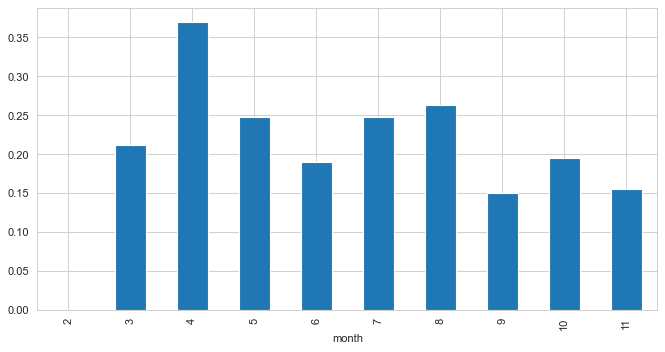

In [47]:
plt.figure(figsize=[10,5],dpi=80)
df.groupby('month')['tickets_out'].mean().plot(kind='bar')
df.groupby('month')['tickets_out'].mean()

month
2     135.000000
3     229.073930
4     225.380126
5     133.903674
6      72.464969
7     152.034202
8     144.242854
9      73.093003
10    127.669958
11    102.455561
Name: ticket_use, dtype: float64

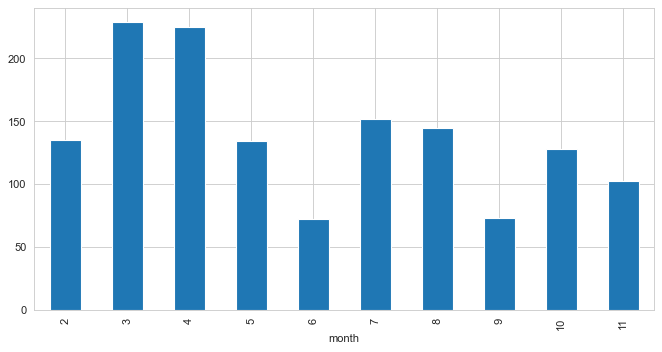

In [48]:
plt.figure(figsize=[10,5],dpi=80)
df.groupby('month')['ticket_use'].mean().plot(kind='bar')
df.groupby('month')['ticket_use'].mean()

month
2      351.986381
3     1031.875152
4      925.087000
5      786.526909
6      826.564950
7      844.216384
8      856.115195
9      859.817640
10     832.678401
11     800.488904
Name: capacity, dtype: float64

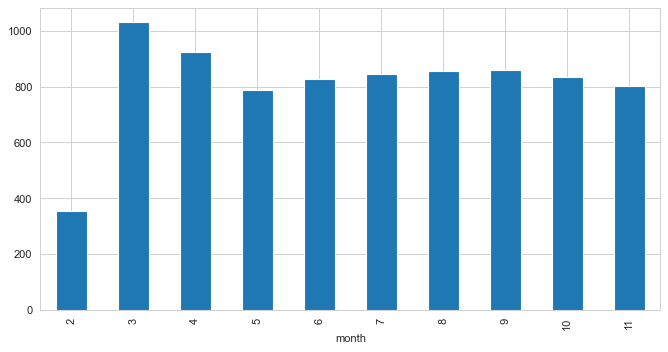

In [49]:
plt.figure(figsize=[10,5],dpi=80)
df.groupby('month')['capacity'].mean().plot(kind='bar')
df.groupby('month')['capacity'].mean()

month
2     1.500000
3     4.705529
4     4.178051
5     3.580902
6     3.762370
7     3.935973
8     4.017738
9     3.918103
10    3.878167
11    3.815728
Name: show_time, dtype: float64

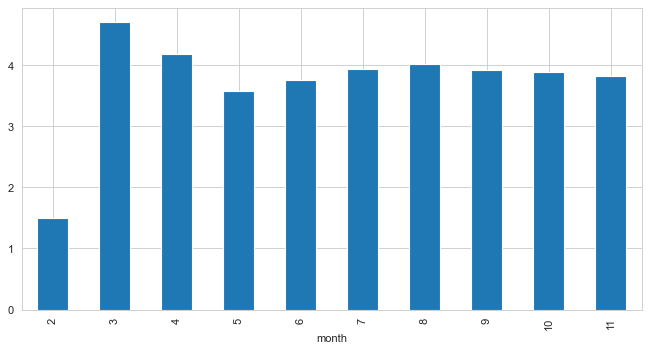

In [50]:
plt.figure(figsize=[10,5],dpi=80)
df.groupby('month')['show_time'].mean().plot(kind='bar')
df.groupby('month')['show_time'].mean()

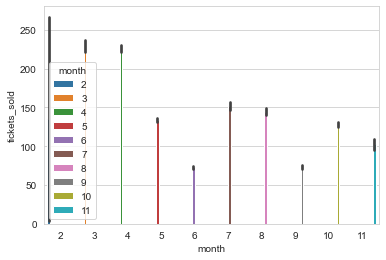

In [51]:
sns.barplot(y='tickets_sold',x='month',hue='month',data=df);

# Correlation

In [52]:
cor=df.corr()

<AxesSubplot:>

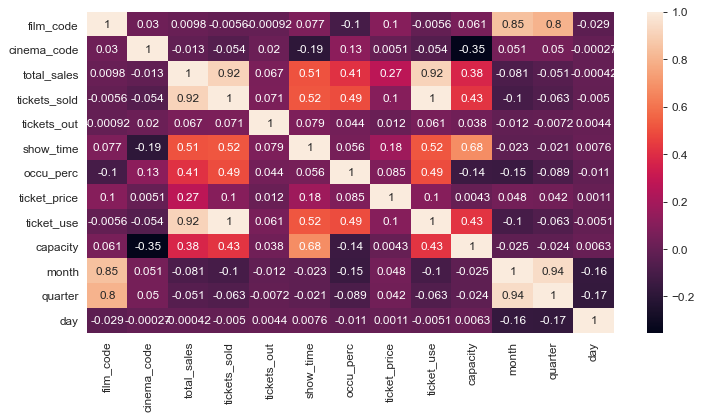

In [53]:
plt.figure(figsize=[10,5],dpi=85)
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

# Distribution Plot

<AxesSubplot:xlabel='total_sales', ylabel='Density'>

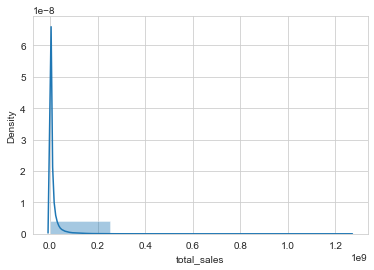

In [54]:
sns.distplot(df['total_sales'],bins=5)

<AxesSubplot:xlabel='tickets_sold', ylabel='Density'>

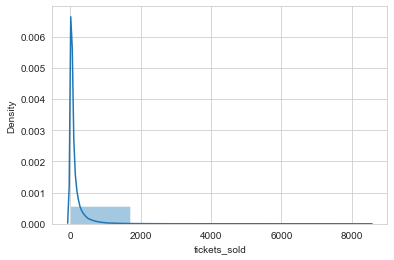

In [55]:
sns.distplot(df['tickets_sold'],bins=5)

<AxesSubplot:xlabel='tickets_out', ylabel='Density'>

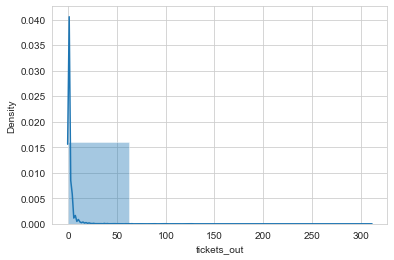

In [56]:
sns.distplot(df['tickets_out'],bins=5)

<AxesSubplot:xlabel='occu_perc', ylabel='Density'>

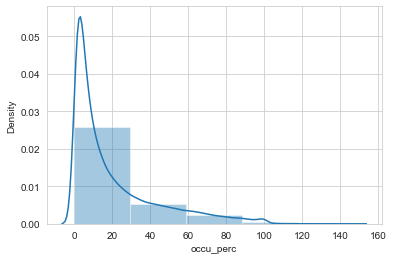

In [57]:
sns.distplot(df['occu_perc'],bins=5)

<AxesSubplot:xlabel='ticket_price', ylabel='Density'>

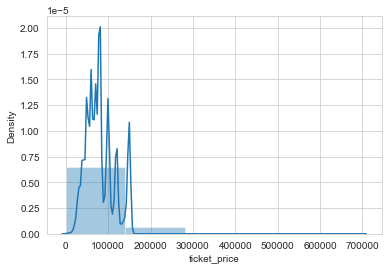

In [58]:
sns.distplot(df['ticket_price'],bins=5)

<AxesSubplot:xlabel='ticket_use', ylabel='Density'>

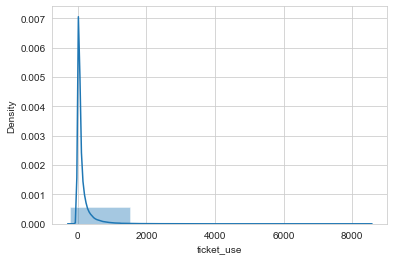

In [59]:
sns.distplot(df['ticket_use'],bins=5)

<AxesSubplot:xlabel='capacity', ylabel='Density'>

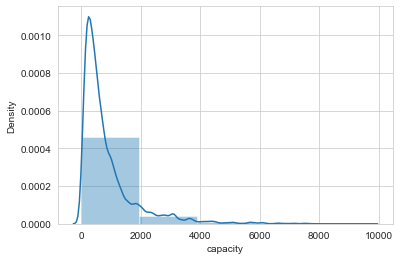

In [60]:
sns.distplot(df['capacity'],bins=5)

<AxesSubplot:xlabel='total_sales', ylabel='Density'>

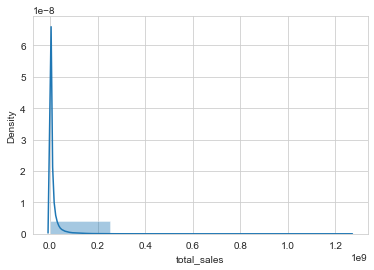

In [61]:
sns.distplot(df['total_sales'],bins=5)

<AxesSubplot:xlabel='month', ylabel='Density'>

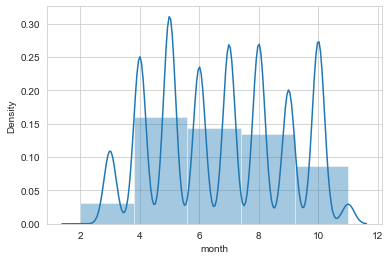

In [62]:
sns.distplot(df['month'],bins=5)

<AxesSubplot:xlabel='quarter', ylabel='Density'>

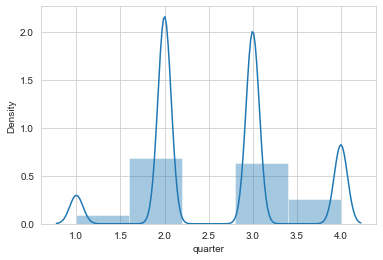

In [63]:
sns.distplot(df['quarter'],bins=5)

<AxesSubplot:xlabel='day', ylabel='Density'>

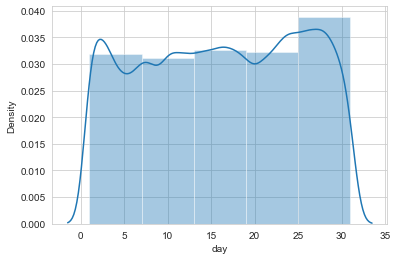

In [64]:
sns.distplot(df['day'],bins=5)